In [5]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# Load AG News dataset (adjust path & column names if needed)
df = pd.read_csv("../data/ag_news_train.csv")   # columns: label, title, description

# Merge title + description into one text column
df['text'] = (df['title'].fillna('') + " " + df['description'].fillna('')).str.lower()

# Basic cleaning: remove links and extra spaces
df['text'] = df['text'].apply(lambda x: re.sub(r"http\S+|www\.\S+", " ", str(x)))
df['text'] = df['text'].str.replace(r"\s+", " ", regex=True).str.strip()

# Split into train/val
X_train, X_val, y_train, y_val = train_test_split(
    df['text'], df['label'], test_size=0.16666, stratify=df['label'], random_state=42
)

print("Train size:", len(X_train), "Validation size:", len(X_val))
print("Classes:", df['label'].unique())


Train size: 100000 Validation size: 20000
Classes: [3 4 2 1]


In [6]:
import matplotlib.pyplot as plt

In [8]:
# Rebuild a working DF for inspection
df_md = pd.DataFrame({ 'text': X_train, 'label': y_train }).copy()

In [9]:
# 1) Quantify missing
miss_counts = df_md.isnull().sum()
print("Missing values per column:\n", miss_counts)

Missing values per column:
 text     0
label    0
dtype: int64


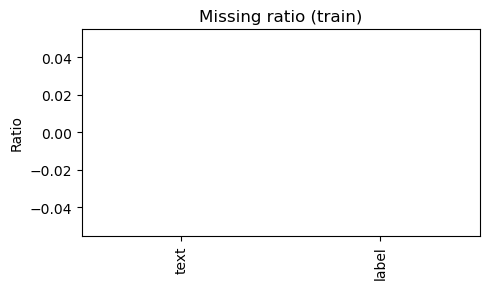

In [10]:
# 2) Visualize missing proportion
plt.figure(figsize=(5,3))
(miss_counts / len(df_md)).plot(kind='bar')
plt.title("Missing ratio (train)")
plt.ylabel("Ratio")
plt.tight_layout(); plt.show()

In [11]:
# 3) Treat missing
# - Drop rows with missing labels (critical target)
before = len(df_md)
df_md = df_md.dropna(subset=['label'])

In [12]:
# - Fill missing text with empty string (safe for vectorizers)
df_md['text'] = df_md['text'].fillna('')

In [13]:
after = len(df_md)
print(f"Rows before: {before}, after cleaning: {after}")

Rows before: 100000, after cleaning: 100000
